In [1]:
import numpy as np
from scipy import optimize
import scipy.optimize as opt
from scipy.optimize import minimize
import sympy as sp
import matplotlib.pyplot as plt
import sympy as sp
from ipywidgets import interact, FloatSlider, interactive
import ipywidgets as widgets






# The Solow Model
The Solow Model is a macroeconomic framework that analyzes long-term economic growth. This model focuses on how different factors such as capital accumulation and labor force characteristics affects the output of the economy. As an extension to the model, we introduce endogenous technological growth to give a more nuanced picture of the economic growth.
## Assumptions of the Solow Model

The model simplifies real economies by making several key assumptions:

- **Single Representative Firm**: The economy consists of a single, representative firm.
- **Fixed Labor Force**: The total number of workers (labor force) is constant.
- **Constant Returns to Scale**: The production function is homogeneous of degree one, implying that scaling all inputs by a constant results in output scaling by the same constant.
- **Diminishing Returns to Capital**: As capital stock increases while other factors remain fixed, each additional unit of capital produces less additional output. So output increases at a decreasing rate. 
- **Closed Economy**: The economy does not engage in trade, meaning there are no imports or exports.

## Key Variables and Parameters

- $ Y $ = Output, commonly referred to as Gross Domestic Product (GDP).
- $ K $ = Capital stock 
- $ L $ = Labor force
- $ A $ = Technological progress
- $ s $ = Savings rate, defined as the proportion of output that is saved and reinvested.
- $ \delta $ = Depreciation rate, which is the rate at which capital stock depreciates.
- $ n $ = Labor growth rate
- $ \alpha $ = Output elasticity of capital, representing capital's contribution to output.
- $ 1 - \alpha $ = Output elasticity of labor, representing labor's contribution to output.

## Mathematical Representation of the Production Function

The production function can be expressed with a Cobb-Douglas form:

$$
Y = A K^\alpha L^{1-\alpha}
$$

Output (Y) is determined by the levels of capital (K), labor (L), and technological progress (A). The parameters $\alpha$ and $1 - \alpha$ represent the output elasticities of capital and labor, respectively, indicating how sensitive output is to changes in each input.

## Dynamic Equations of the Model

The model's dynamics are driven by the equations of capital accumulation and technological growth:

### Capital Accumulation

$$
\frac{dK}{dt} = sY - \delta K
$$

This differential equation describes how the capital stock evolves over time, where $sY$ is the total investment from saving a fraction $s$ of output, and $\delta K$ is the loss of capital due to depreciation.

### Technological Progress

Assuming exogenous technological progress (which we change to endogenous later in the project), the growth rate of technology ($g$) is constant:

$$
\frac{dA}{dt} = gA
$$

The model can be further analyzed to derive steady-state solutions and to look at the impact of changes in parameters like the savings rate, depreciation rate, and technology growth rate on the long-run economic growth of the economy.


In the code section below we define all of the above equations. We also introduce output and capital per capita, and output per capita growth, which is used to solve for steady-state capital per capita.


In [2]:
# Define symbols more descriptively
Capital, Output, Labor, Technology = sp.symbols('K Q L A')
SavingsRate, DepreciationRate, LaborGrowthRate, TechGrowthRate, OutputElasticity = sp.symbols('s delta n g alpha')

# Production Function
production_function = Technology * Capital**OutputElasticity * Labor**(1 - OutputElasticity)

# Capital Accumulation
capital_accumulation = SavingsRate * Output + Capital * (1 - DepreciationRate)

# Output and Capital per Capita
output_per_capita = Output / Labor
capital_per_capita = Capital / Labor

# Output per Capita Growth
output_per_capita_growth = (1 - LaborGrowthRate) * (SavingsRate / capital_per_capita) - (DepreciationRate + TechGrowthRate)

# Solve for steady-state capital per capita
steady_state_equation = sp.solve(output_per_capita_growth, Capital)[0]
steady_state_function = sp.lambdify((SavingsRate, DepreciationRate, LaborGrowthRate, TechGrowthRate, OutputElasticity, Labor), steady_state_equation)



## Steady-State 

In the Solow Model, the steady-state is a condition where the capital per capita is constant over time, implying that the economy has reached an equilibrium level of capital.

### Steady-State Capital per Capita

By using the modified solow equation and isolating capital per capita, the steady-state capital per capita is given by the following:

$$ k^* = \frac{s(1 - n)}{\delta + g} $$

This is the case where capital in current period equals capital in all future periods.

#### Economic Interpretation:
This equation shows that the steady-state capital per capita depends negatively on the depreciation rate, the technological growth rate and the labor force growth rate. It depends positively on the savingsrate. A higher savings rate or a lower labor growth rate leads to higher steady-state capital per capita, ceteris paribus. The denominator, $ \delta + g $, indicates that faster depreciation of capital or faster technological progress both require higher savings to maintain the same level of capital per capita, as new technology might make existing capital obsolete faster.

### Steady-State Output per Capita

Given the steady-state capital per capita, the steady-state output per capita can be derived as:

$$ y^* = A \left(\frac{s(1 - n)}{\delta + g}\right)^\alpha $$

Where:
- $ y^* $ = steady-state output per capita
- $ A $ = initial level of technology
- $ \alpha $ = output elasticity of capital, representing how output increases with an increase in capital

#### Economic Interpretation:
This formula demonstrates how the level of technology amplifies the effects of capital per capita on output per capita. The term $\left(\frac{s(1 - n)}{\delta + g}\right)^\alpha$ shows that output per capita is more responsive to changes in the capital-labor ratio in economies where capital is a more significant factor in production ($\alpha$ is large). And higher technological levels (represented by $A$) directly increase output per capita by making each unit of capital more productive.


### Finding Steady State Capital per Capita
In the following code section, we assume realistic parameter values, we then define a steady state condition and then use Broyden's metod to derive steady state capital per capita level.

In [3]:
# Define parameters
s = 0.4
delta = 0.04  
n = 0.01  
g = 0.01 
alpha = 0.33  

# Function representing the steady state condition for k, i.e., kt = kt+1
def steady_state_condition(k):
    if k <= 0:
        return np.inf  # Return a large value to avoid negative capital inputs
    # Output per unit of capital
    f_k = k**alpha
    # Next period's capital per unit of capital
    k_next = s * f_k / (delta + n + g)
    # Return the difference between current and next period capital
    return k - k_next

# Improved initial guess based on economic intuition
k_initial_guess = s / (delta + n + g)  # This is based on the derived formula for steady-state capital

# Finding the root of the steady state condition using Broyden's method
steady_state_k_root = opt.broyden1(steady_state_condition, k_initial_guess, f_tol=1e-7)

if steady_state_k_root > 0:
    print("Steady-State Capital per Capita:", steady_state_k_root)
else:
    print("Failed to find a valid steady-state capital per capita.")


Steady-State Capital per Capita: 16.97127765594836


# Economic Insights from Optimization Results

The Above section optimizes capital per capita. Results indicate varied optimal capital levels leading to different outputs per capita based on initial estimates.

## Key Findings
1. **Initial Conditions**: Capital per capita depends on the initial guess of capital. So we have different economic outcomes based on starting condtitions. The Base parameters section are our initial guesses.
2. **Scale of Capital**: The optimal capital values suggest a capital-intensive scenario. It highlights the importance of capital in the economy but also indicates diminishing returns as capital increases.
3. **Output Elasticity of Capital**: The elasticity parameter $\alpha=0.3$ shows that while capital significantly impacts output, it does not solely drive economic productivity. Other factors like labor or technological advancements are also crucial.


## Test of parameter changes
To see the effect of our initial conditions variying, the following code section provides a test for changes in all parameters.

In [4]:
# Base parameters
initial_technology = 1.0 
constant_savings_rate = 0.4  
annual_depreciation_rate = 0.04  
labor_growth_annual_rate = 0.01 
technological_growth_rate = 0.01  
cobb_douglas_exponent = 0.33  # Exponent in Cobb-Douglas production function

# Function to calculate steady state capital and output
def calculate_steady_state(technology, savings_rate, depreciation_rate, labor_growth_rate, tech_growth_rate, output_elasticity):
    """Calculate steady-state capital and output for given economic parameters."""
    def steady_state_condition(capital):
        if capital <= 0:
            return np.inf  # Avoid negative or zero capital inputs
        output = technology * capital ** output_elasticity
        return savings_rate * output - (depreciation_rate + labor_growth_rate + tech_growth_rate) * capital
    
    initial_guess = [savings_rate / (depreciation_rate + labor_growth_rate + tech_growth_rate)]  # Economic intuition for initial guess
    result = opt.broyden1(steady_state_condition, initial_guess, f_tol=1e-7)  # Use Broyden's method
    
    if result.size and result[0] > 0:
        capital_ss = result[0]
        output_ss = technology * capital_ss ** output_elasticity
        return capital_ss, output_ss
    else:
        return None, None

# Parameter sensitivity testing
parameters = {
    'technology': [0.8, 1.0, 1.2],
    'savings_rate': [0.2, 0.3, 0.4],
    'depreciation_rate': [0.04, 0.05, 0.06],
    'labor_growth_rate': [0.01, 0.02, 0.03],
    'tech_growth_rate': [0.005, 0.01, 0.015],
    'output_elasticity': [0.25, 0.3, 0.35]
}

for key, values in parameters.items():
    print(f"Testing changes in parameter: {key}")
    for value in values:
        updated_params = {
            'technology': initial_technology,
            'savings_rate': constant_savings_rate,
            'depreciation_rate': annual_depreciation_rate,
            'labor_growth_rate': labor_growth_annual_rate,
            'tech_growth_rate': technological_growth_rate,
            'output_elasticity': cobb_douglas_exponent
        }
        updated_params[key] = value

        k_steadystate, y_steadystate = calculate_steady_state(**updated_params)
        
        if k_steadystate is not None and y_steadystate is not None:
            print(f"{key} = {value:.3f} => Steady state: Capital = {k_steadystate:.4f}, Output = {y_steadystate:.4f}")
        else:
            print(f"{key} = {value:.3f} => Failed to calculate steady state.")

    print() 

 

Testing changes in parameter: technology
technology = 0.800 => Steady state: Capital = 12.1639, Output = 1.8246
technology = 1.000 => Steady state: Capital = 16.9713, Output = 2.5457
technology = 1.200 => Steady state: Capital = 22.2790, Output = 3.3418

Testing changes in parameter: savings_rate
savings_rate = 0.200 => Steady state: Capital = 6.0314, Output = 1.8094
savings_rate = 0.300 => Steady state: Capital = 11.0469, Output = 2.2094
savings_rate = 0.400 => Steady state: Capital = 16.9713, Output = 2.5457

Testing changes in parameter: depreciation_rate
depreciation_rate = 0.040 => Steady state: Capital = 16.9713, Output = 2.5457
depreciation_rate = 0.050 => Steady state: Capital = 13.4832, Output = 2.3596
depreciation_rate = 0.060 => Steady state: Capital = 11.0469, Output = 2.2094

Testing changes in parameter: labor_growth_rate
labor_growth_rate = 0.010 => Steady state: Capital = 16.9713, Output = 2.5457
labor_growth_rate = 0.020 => Steady state: Capital = 13.4832, Output = 2.3


This analysis investigates how changes in key economic parameters affect the steady-state values of capital and output in a modeled economy. These parameters include technology level, savings rate, depreciation rate, labor growth rate, tech growth rate, and output elasticity.

## Findings

### 1. Technology

- **Economic Interpretation**: Higher technology levels directly enhance the productivity of capital and labor, leading to higher output. This reflects the crucial role of technological advancements in economic growth.

### 2. Savings Rate

- **Economic Interpretation**: Higher savings rate implies increases in capital and output per capita, as higher savings from previous period increases the amount os possible capital investment, and more capital increases output.

### 3. Depreciation Rate

- **Economic Interpretation**: A higher depreciation rate means that more capital is lost over time, which decreases output per capita in steady state.

### 4. Labor Growth Rate

- **Economic Interpretation**: Labor growth means that capital per capita decreases (denominator increases), so that output per capita also decreases.

### 5. Technological Growth Rate

- **Economic Interpretation**: Higher technological growth decreases capital and output per capita in steady state.

### 6. Output Elasticity.
- **Economic Interpretation**: Output elasticity represents how responsive the output is to changes in capital. Higher elasticity values mean that output is more sensitive to capital increases, leading to much larger outputs as capital increases. This highlights the important role of capital's productivity in driving economic growth.


## Graphical visualization
The following code section plots 6 diagrams, showing the effect on the steady state output level of changes in each of the parameter values. We see the same results as when testing changes in parameters in the above code section.


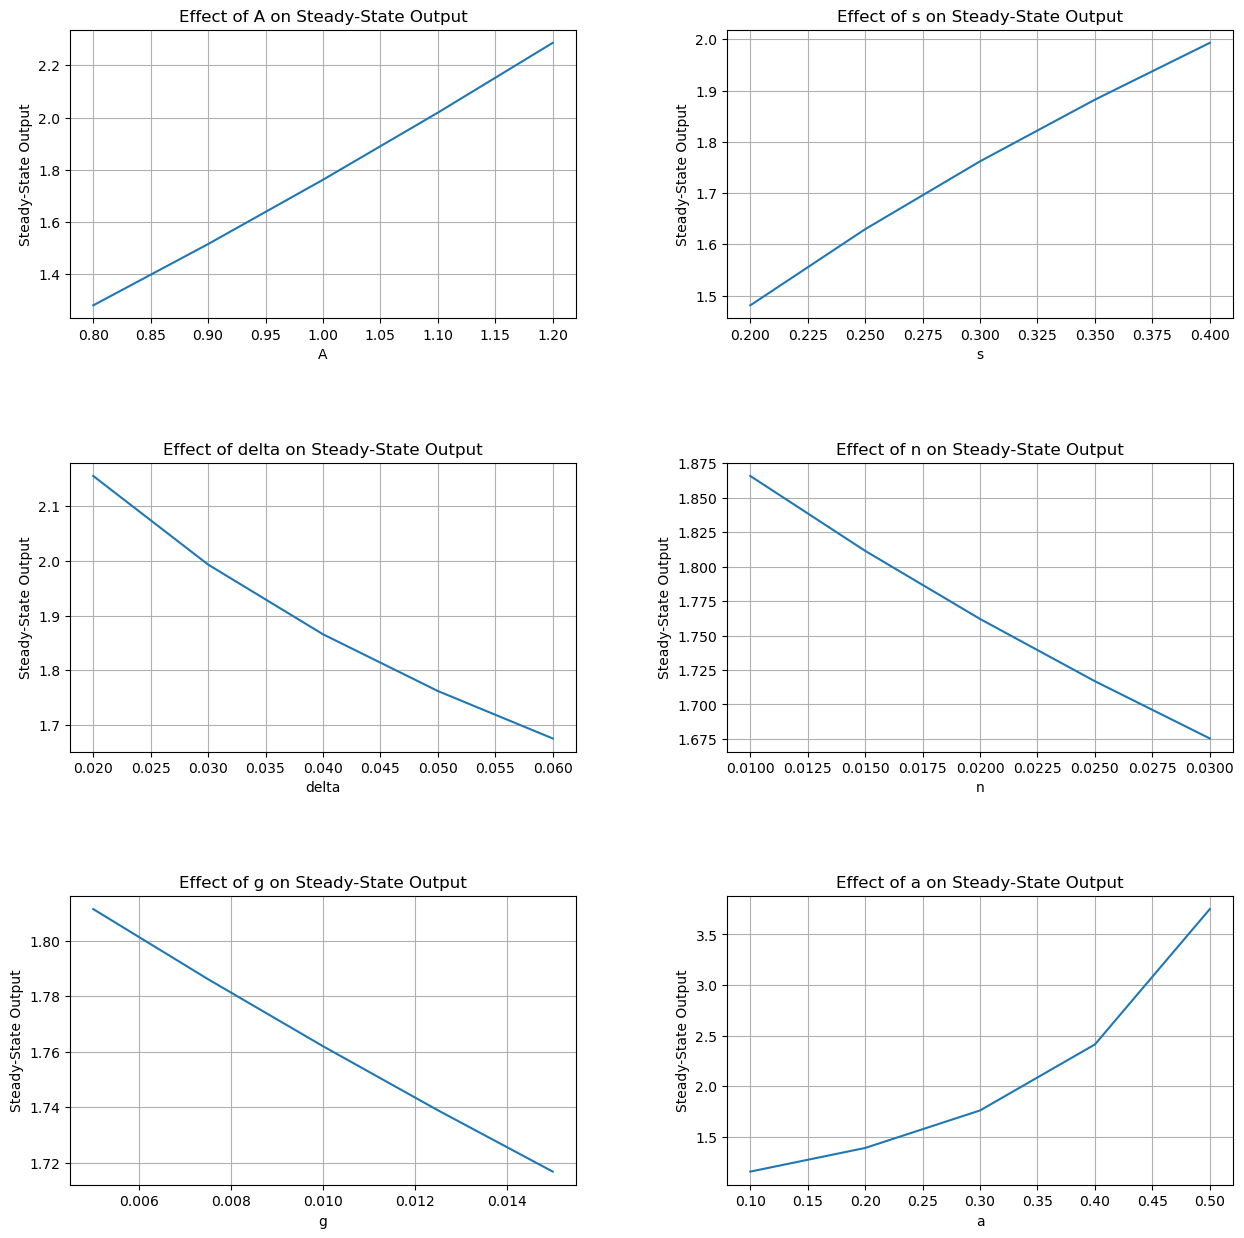

In [5]:
# Function to calculate steady-state capital and output
def calculate_steady_state(A, s, delta, n, g, a):
    def steady_state_condition(k):
        if k <= 0:
            return np.inf  # Prevent non-positive capital levels
        output = A * k ** a  # Simplified Cobb-Douglas production function for labor normalized to 1
        # Investment = Net investment - Depreciation
        net_investment = s * output - (delta + n + g) * k
        return net_investment

    initial_guess = [s / (delta + n + g)]  # Initial guess for capital
    result = opt.broyden1(steady_state_condition, initial_guess, f_tol=1e-7)  # Using Broyden's method

    if result.size and result[0] > 0:
        k_ss = result[0]
        y_ss = A * (k_ss ** a)  # Output at steady state
        return k_ss, y_ss
    else:
        return None, None

# Plotting function to visualize the effects of parameter changes
def plot_parameter_effects():
    param_ranges = {
        'A': np.linspace(0.8, 1.2, 5),
        's': np.linspace(0.2, 0.4, 5),
        'delta': np.linspace(0.02, 0.06, 5),
        'n': np.linspace(0.01, 0.03, 5),
        'g': np.linspace(0.005, 0.015, 5),
        'a': np.linspace(0.1, 0.5, 5)
    }

    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    base_params = {'A': 1.0, 's': 0.3, 'delta': 0.05, 'n': 0.02, 'g': 0.01, 'a': 0.3}

    for ax, (key, values) in zip(axs.flatten(), param_ranges.items()):
        y_values = []
        for value in values:
            updated_params = base_params.copy()
            updated_params[key] = value
            _, y_ss = calculate_steady_state(**updated_params)
            y_values.append(y_ss if y_ss is not None else None)

        ax.plot(values, y_values)
        ax.set_title(f'Effect of {key} on Steady-State Output')
        ax.set_xlabel(f'{key}')
        ax.set_ylabel('Steady-State Output')
        ax.grid(True)

    plt.show()

# Call the plot function
plot_parameter_effects()


# Extension to the Solow Model and Graph Analysis

### Conclusion

By making technology endogenous and examining different growth paths, this extended Solow model offers a more nuanced understanding of the factors driving economic growth and their interdependencies. This approach not only aligns with empirical observations but also enhances the model's utility for policy analysis.

The following code section plots a transitional line of steady state capital, with the underlying feature that technological level is defined as an array of technological levels over time. We include interactive sliders for technological growth rate to see how this affects the transition of capital towards steady state.


In [6]:
initial_technology_level = 1.0  
constant_savings_rate = 0.3 
annual_depreciation_rate = 0.05  
labor_growth_annual_rate = 0.02  

# Function to calculate steady state level of capital based on technology changes
def calculate_steady_state_capital(technology_level):
    """ Calculate steady state capital based on technology level, considering economic factors.
    
    Args:
        technology_level (array): Array of technology levels over time.

    Returns:
        array: Array of steady state capitals over time.
    """
    steady_state_capital = ((constant_savings_rate * technology_level) /
                            (annual_depreciation_rate + labor_growth_annual_rate * technology_level)) ** (1 / (1 - labor_growth_annual_rate))
    return steady_state_capital

# Function to visualize the impact of technological growth on steady state capital over time
def visualize_steady_state_growth(tech_growth_rate):
    """ Plot the steady state capital over time based on the technology growth rate.

    Args:
        tech_growth_rate (float): Annual technological growth rate.
    """
    time_periods = np.arange(0, 500)  # Time period for simulation, from 0 to 500 years
    technology_growth = initial_technology_level * np.exp(tech_growth_rate * time_periods)
    
    steady_state_capital_over_time = calculate_steady_state_capital(technology_growth)
    
    plt.figure(figsize=(10, 6))
    plt.plot(time_periods, steady_state_capital_over_time, label=f'Technological Growth Rate: {tech_growth_rate:.2f}')
    plt.xlabel('Time (years)')
    plt.ylabel('Steady State Capital (k)')
    plt.title('Steady State Capital for Technological Growth Rate: {:.2%}'.format(tech_growth_rate))
    plt.legend()
    plt.grid(True)
    plt.show()


# Interactive sliders to adjust and visualize the effects of different technological growth rates
interact(visualize_steady_state_growth, tech_growth_rate=FloatSlider(value=0.01, min=0.00, max=0.10, step=0.01, description='Technological Growth Rate'))


interactive(children=(FloatSlider(value=0.01, description='Technological Growth Rate', max=0.1, step=0.01), Ou…

<function __main__.visualize_steady_state_growth(tech_growth_rate)>

From the interactive graph it is seen that the technological growth rate g, makes for faster convergance toward steady state. As g increases the steady state capital graph becomes more steep, so that it converges in less time. This could be explained by a higher g requires a higher rate of investments to grow capital. This results in a quicker adjustment process as the economy works to align capital per effective worker with the new steady-state level.

# Conclusion


### Influence of Productivity and Capital Elasticity:
- **Total Factor Productivity (A) and Output Elasticity of Capital (α)**:
  Increasing total factor productivity or the output elasticity of capital elevates the steady state levels of both capital and output per capita. A higher total factor productivity enhances the effectiveness of both labor and capital in producing output, thereby raising the output for any given level of capital and labor. Similarly, an increase in the output elasticity of capital means that output becomes more sensitive to changes in the capital stock, leading to higher output levels at equilibrium.

## Extension Involving Technological Growth Rate:
- **Impact of Technological Growth Rate (g)**:
  Our extended analysis includes adjusting the growth rate of technology, as depicted in the provided graph. Increasing the technological growth rate enhances the economy's ability to reach its steady state faster. This is shown by the steep initial increase in steady-state capital as the technological growth rate improves. Although higher growth rates makes for faster convergence, the steady-state levels remain unaffected. Conversely, a lower technological growth rate results in a slower approach to the steady state.

